In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [3]:
joined_data = pd.read_csv('combined.csv')

In [4]:
joined_data.isna().sum()
     

Rk_22       1
Player      0
Age_22      1
Team_22     1
Pos_22      1
G_22        1
GS_22       1
MP_22       1
FG_22       1
FGA_22      1
FG%_22      2
3P_22       1
3PA_22      1
3P%_22     22
2P_22       1
2PA_22      1
2P%_22      9
eFG%_22     2
FT_22       1
FTA_22      1
FT%_22     30
ORB_22      1
DRB_22      1
TRB_22      1
AST_22      1
STL_22      1
BLK_22      1
TOV_22      1
PF_22       1
PTS_22      1
Rk_23       1
Age_23      1
Team_23     1
Pos_23      1
G_23        1
GS_23       1
MP_23       1
FG_23       1
FGA_23      1
FG%_23      3
3P_23       1
3PA_23      1
3P%_23     35
2P_23       1
2PA_23      1
2P%_23     10
eFG%_23     3
FT_23       1
FTA_23      1
FT%_23     50
ORB_23      1
DRB_23      1
TRB_23      1
AST_23      1
STL_23      1
BLK_23      1
TOV_23      1
PF_23       1
PTS_23      1
dtype: int64

In [5]:
joined_data.dropna(inplace = True)

In [6]:
joined_data.isna().sum()

Rk_22      0
Player     0
Age_22     0
Team_22    0
Pos_22     0
G_22       0
GS_22      0
MP_22      0
FG_22      0
FGA_22     0
FG%_22     0
3P_22      0
3PA_22     0
3P%_22     0
2P_22      0
2PA_22     0
2P%_22     0
eFG%_22    0
FT_22      0
FTA_22     0
FT%_22     0
ORB_22     0
DRB_22     0
TRB_22     0
AST_22     0
STL_22     0
BLK_22     0
TOV_22     0
PF_22      0
PTS_22     0
Rk_23      0
Age_23     0
Team_23    0
Pos_23     0
G_23       0
GS_23      0
MP_23      0
FG_23      0
FGA_23     0
FG%_23     0
3P_23      0
3PA_23     0
3P%_23     0
2P_23      0
2PA_23     0
2P%_23     0
eFG%_23    0
FT_23      0
FTA_23     0
FT%_23     0
ORB_23     0
DRB_23     0
TRB_23     0
AST_23     0
STL_23     0
BLK_23     0
TOV_23     0
PF_23      0
PTS_23     0
dtype: int64

In [7]:
joined_data.shape

(646, 59)

In [8]:
joined_data.dtypes

Rk_22      float64
Player      object
Age_22     float64
Team_22     object
Pos_22      object
G_22       float64
GS_22      float64
MP_22      float64
FG_22      float64
FGA_22     float64
FG%_22     float64
3P_22      float64
3PA_22     float64
3P%_22     float64
2P_22      float64
2PA_22     float64
2P%_22     float64
eFG%_22    float64
FT_22      float64
FTA_22     float64
FT%_22     float64
ORB_22     float64
DRB_22     float64
TRB_22     float64
AST_22     float64
STL_22     float64
BLK_22     float64
TOV_22     float64
PF_22      float64
PTS_22     float64
Rk_23      float64
Age_23     float64
Team_23     object
Pos_23      object
G_23       float64
GS_23      float64
MP_23      float64
FG_23      float64
FGA_23     float64
FG%_23     float64
3P_23      float64
3PA_23     float64
3P%_23     float64
2P_23      float64
2PA_23     float64
2P%_23     float64
eFG%_23    float64
FT_23      float64
FTA_23     float64
FT%_23     float64
ORB_23     float64
DRB_23     float64
TRB_23     f

In [9]:
joined_data = joined_data.set_index('Player')

In [10]:
joined_data.head()

,Rk_22,Age_22,Team_22,Pos_22,G_22,GS_22,MP_22,FG_22,FGA_22,FG%_22,...,FT%_23,ORB_23,DRB_23,TRB_23,AST_23,STL_23,BLK_23,TOV_23,PF_23,PTS_23
Player,,,,,,,,,,,,,,,,,,,,,
Joel Embiid,1.0,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,0.548,...,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7
Luka Dončić,2.0,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,0.496,...,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9
Damian Lillard,3.0,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,0.463,...,0.920,0.5,3.9,4.4,7.0,1.0,0.2,2.6,1.8,24.3
Shai Gilgeous-Alexander,4.0,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,0.510,...,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1
Giannis Antetokounmpo,5.0,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,0.553,...,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4


In [12]:
features = joined_data.drop(['PTS_22', 'Pos_22', 'Pos_23', 'Team_22', 'Team_23', 'Rk_22', 'Rk_23'], axis = 1)
# set target to points
target_pts = joined_data[['PTS_22']]

In [13]:
X_train, X_test, y_train_pts, y_test_pts = train_test_split(features, target_pts, test_size=0.25, random_state=42)
     

In [14]:
X_test

,Age_22,G_22,GS_22,MP_22,FG_22,FGA_22,FG%_22,3P_22,3PA_22,3P%_22,...,FT%_23,ORB_23,DRB_23,TRB_23,AST_23,STL_23,BLK_23,TOV_23,PF_23,PTS_23
Player,,,,,,,,,,,,,,,,,,,,,
Dalen Terry,20.0,38.0,0.0,5.6,0.8,1.9,0.444,0.2,0.7,0.259,...,0.581,0.5,1.4,1.9,1.4,0.5,0.3,0.5,1.4,3.1
Obi Toppin,24.0,67.0,5.0,15.7,2.8,6.3,0.446,1.3,3.7,0.344,...,0.770,1.0,2.9,3.9,1.6,0.6,0.5,0.8,1.7,10.3
Aleksej Pokusevski,21.0,34.0,25.0,20.6,3.2,7.3,0.434,1.1,3.1,0.365,...,0.732,0.6,2.6,3.2,1.3,0.5,0.5,0.7,0.8,5.2
Seth Curry,32.0,61.0,7.0,19.9,3.4,7.4,0.463,1.5,3.8,0.405,...,0.903,0.4,1.1,1.5,1.0,0.5,0.1,0.5,0.9,5.1
RJ Barrett,22.0,73.0,73.0,33.9,7.0,16.1,0.434,1.7,5.3,0.310,...,0.629,1.1,5.3,6.4,4.1,0.6,0.4,2.5,2.6,21.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Haywood Highsmith,26.0,54.0,11.0,17.9,1.7,4.0,0.431,0.7,2.0,0.339,...,0.639,1.0,2.2,3.2,1.1,0.8,0.5,0.5,1.8,6.1
Shake Milton,26.0,76.0,11.0,20.6,3.2,6.6,0.479,0.7,1.9,0.378,...,0.667,1.8,2.8,4.5,1.5,0.5,0.3,0.8,0.8,6.8
Jordan Nwora,24.0,24.0,11.0,24.6,4.9,10.3,0.476,1.9,4.5,0.422,...,0.833,0.6,2.8,3.4,1.3,0.6,0.4,1.2,0.9,7.9


In [15]:
X_train

,Age_22,G_22,GS_22,MP_22,FG_22,FGA_22,FG%_22,3P_22,3PA_22,3P%_22,...,FT%_23,ORB_23,DRB_23,TRB_23,AST_23,STL_23,BLK_23,TOV_23,PF_23,PTS_23
Player,,,,,,,,,,,,,,,,,,,,,
Marcus Morris,33.0,65.0,65.0,28.1,4.2,9.9,0.426,1.7,4.7,0.364,...,0.818,0.5,2.3,2.7,0.7,0.3,0.3,0.6,1.5,6.4
Bojan Bogdanović,33.0,59.0,59.0,32.1,7.3,14.9,0.488,2.5,6.0,0.411,...,0.779,0.5,2.9,3.4,2.5,0.8,0.1,2.3,2.0,20.2
Bojan Bogdanović,33.0,59.0,59.0,32.1,7.3,14.9,0.488,2.5,6.0,0.411,...,0.785,0.4,2.3,2.7,1.7,0.5,0.1,1.8,1.7,15.2
Jrue Holiday,32.0,67.0,65.0,32.6,7.3,15.3,0.479,2.4,6.1,0.384,...,0.833,1.2,4.2,5.4,4.8,0.9,0.8,1.8,1.6,12.5
T.J. Warren,29.0,42.0,0.0,16.4,3.1,6.4,0.489,0.5,1.6,0.328,...,0.750,0.5,1.5,2.0,0.8,0.4,0.1,0.4,1.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RJ Barrett,22.0,73.0,73.0,33.9,7.0,16.1,0.434,1.7,5.3,0.310,...,0.831,0.7,3.5,4.3,2.4,0.5,0.3,1.8,1.7,18.2
Christian Wood,27.0,67.0,17.0,25.9,5.9,11.5,0.515,1.6,4.2,0.376,...,0.702,0.8,4.3,5.1,1.0,0.3,0.7,1.0,1.4,6.9
Keita Bates-Diop,27.0,67.0,42.0,21.7,3.5,6.9,0.508,0.8,2.1,0.394,...,0.722,0.8,1.8,2.6,0.9,0.6,0.5,0.3,0.8,4.5


In [16]:
from sklearn.linear_model import LinearRegression

model_pts = LinearRegression()

model_pts.fit(X_train, y_train_pts)

LinearRegression()

In [17]:
pts_predictions_linear = model_pts.predict(X_test)

In [18]:
r_squared = model_pts.score(X_train, y_train_pts)
print("Linear Regression R-squared:", r_squared)
# MSE
print('MSE Linear Regression: %.3f' %np.sqrt(metrics.mean_squared_error(y_test_pts, pts_predictions_linear)))


Linear Regression R-squared: 0.9998861540822478
MSE Linear Regression: 0.077


In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model_pts_forest = RandomForestRegressor()

In [21]:
model_pts_forest.fit(X_train, y_train_pts)

c:\Users\swapn\Desktop\NBA_2\env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [22]:
pts_predictions_forest = model_pts_forest.predict(X_test)

In [23]:
r_squared_forest = model_pts_forest.score(X_train, y_train_pts)

# compare model accuracy to linear regression
print("Linear Regression R-squared:", r_squared)
print("Random Forest Regression R-squared:", r_squared_forest)
print("-----------------------------")
# MSE
print('MSE Linear Regression: %.3f' %np.sqrt(metrics.mean_squared_error(y_test_pts, pts_predictions_linear)))
print('MSE for Random Forest Regression: %.3f' %np.sqrt(metrics.mean_squared_error(y_test_pts, pts_predictions_forest)))
     

Linear Regression R-squared: 0.9998861540822478
Random Forest Regression R-squared: 0.9983833538580732
-----------------------------
MSE Linear Regression: 0.077
MSE for Random Forest Regression: 0.632


In [24]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and y data
regressor.fit(X_train, y_train_pts)

DecisionTreeRegressor(random_state=0)

In [25]:
pts_predictions_decission = regressor.predict(X_test)

In [26]:
# model accuracy for decission tree regressor
r_squared_decissiontree = regressor.score(X_train, y_train_pts)

# compare model accuracy to linear regression and random forest regression model
print("Linear Regression R-squared:", r_squared)
print("Random Forest Regression R-squared:", r_squared_forest)
print("Random Decission tree R-squared:", r_squared_decissiontree)
print("-----------------------------")
# MSE
print('MSE Linear Regression: %.3f' %np.sqrt(metrics.mean_squared_error(y_test_pts, pts_predictions_linear)))
print('MSE for Random Forest Regression: %.3f' %np.sqrt(metrics.mean_squared_error(y_test_pts, pts_predictions_forest)))
print('MSE for Decission TreeRegression: %.3f' %np.sqrt(metrics.mean_squared_error(y_test_pts, pts_predictions_decission)))
     

Linear Regression R-squared: 0.9998861540822478
Random Forest Regression R-squared: 0.9983833538580732
Random Decission tree R-squared: 1.0
-----------------------------
MSE Linear Regression: 0.077
MSE for Random Forest Regression: 0.632
MSE for Decission TreeRegression: 1.125


In [27]:

# import the regressor
from sklearn import linear_model

# create a regressor object
clf = linear_model.Lasso(alpha=0.1, random_state = 42)

# fit the regressor with X and y data
clf.fit(X_train, y_train_pts)

Lasso(alpha=0.1, random_state=42)

In [28]:
pts_predictions_clf = clf.predict(X_test)

In [29]:
# model accuracy for Lasso regressor
r_squared_lasso = clf.score(X_train, y_train_pts)

# compare model accuracy to linear regression, random forest regression model and Decission TreeRegressor
print("Linear Regression R-squared:", r_squared)
print("Random Forest Regression R-squared:", r_squared_forest)
print("Random Decission tree R-squared:", r_squared_decissiontree)
print("Lasso Regression tree R-squared:", r_squared_lasso)
print("-----------------------------")
# MSE
print('MSE Linear Regression: %.3f' %np.sqrt(metrics.mean_squared_error(y_test_pts, pts_predictions_linear)))
print('MSE for Random Forest Regression: %.3f' %np.sqrt(metrics.mean_squared_error(y_test_pts, pts_predictions_forest)))
print('MSE for Decission TreeRegression: %.3f' %np.sqrt(metrics.mean_squared_error(y_test_pts, pts_predictions_decission)))
print('MSE for Lasso Regression: %.3f' %np.sqrt(metrics.mean_squared_error(y_test_pts, pts_predictions_clf)))
     

Linear Regression R-squared: 0.9998861540822478
Random Forest Regression R-squared: 0.9983833538580732
Random Decission tree R-squared: 1.0
Lasso Regression tree R-squared: 0.9979465016307125
-----------------------------
MSE Linear Regression: 0.077
MSE for Random Forest Regression: 0.632
MSE for Decission TreeRegression: 1.125
MSE for Lasso Regression: 0.363


In [30]:
# Make predictions for each player using the Linear Regression Model
# Get the entire data
full_set = pd.concat([X_train, X_test])

# Make predictions for entire data using Linear regression
pts_predictions = model_pts.predict(full_set)

In [31]:

player_names = full_set.index.unique()

In [40]:
# Import Random
import random

# Make prediction for randomly selected player
player_names = joined_data.index.unique()
select_player = random.choice(player_names)
player_row = joined_data[joined_data.index == select_player]
player_features = player_row.drop(['PTS_22', 'Pos_22', 'Pos_23', 'Team_22', 'Team_23', 'Rk_22', 'Rk_23'], axis = 1)

In [41]:
pts_actual = player_row[['PTS_22']].values[0]
pts_actual_2021 = player_row[['PTS_23']].values[0]
# Predict points and assists for the player
pts_predicted = model_pts.predict(player_features)[0]
print("Player:", select_player)
print("2021-2022 Points:", pts_actual_2021)
print("2022-2023 Points:", pts_actual)
print("2023-2024 Predicted Points:", pts_predicted)

Player: Jrue Holiday
2021-2022 Points: [12.5]
2022-2023 Points: [19.3]
2023-2024 Predicted Points: [19.34553816]


In [42]:
columns_to_drop = ['Age_23']
joined_data.drop(columns=columns_to_drop, inplace=True)

In [43]:
joined_data.columns

Index(['Rk_22', 'Age_22', 'Team_22', 'Pos_22', 'G_22', 'GS_22', 'MP_22',
       'FG_22', 'FGA_22', 'FG%_22', '3P_22', '3PA_22', '3P%_22', '2P_22',
       '2PA_22', '2P%_22', 'eFG%_22', 'FT_22', 'FTA_22', 'FT%_22', 'ORB_22',
       'DRB_22', 'TRB_22', 'AST_22', 'STL_22', 'BLK_22', 'TOV_22', 'PF_22',
       'PTS_22', 'Rk_23', 'Team_23', 'Pos_23', 'G_23', 'GS_23', 'MP_23',
       'FG_23', 'FGA_23', 'FG%_23', '3P_23', '3PA_23', '3P%_23', '2P_23',
       '2PA_23', '2P%_23', 'eFG%_23', 'FT_23', 'FTA_23', 'FT%_23', 'ORB_23',
       'DRB_23', 'TRB_23', 'AST_23', 'STL_23', 'BLK_23', 'TOV_23', 'PF_23',
       'PTS_23'],
      dtype='object')

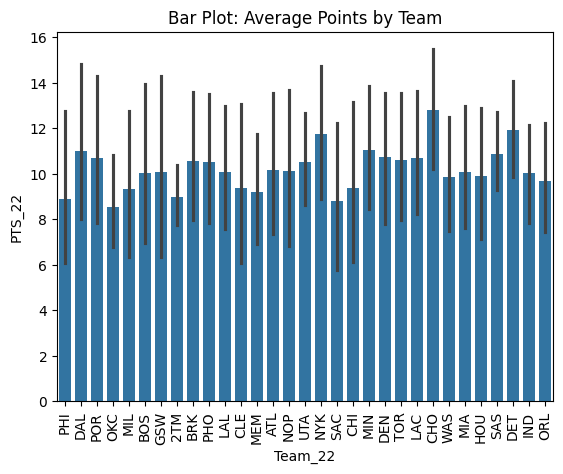

In [45]:
sns.barplot(x='Team_22', y='PTS_22', data=joined_data)
plt.title('Bar Plot: Average Points by Team')
plt.xticks(rotation=90)
plt.show()

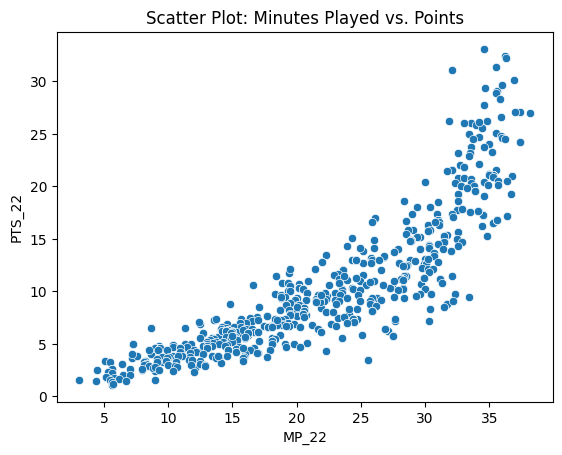

In [47]:
sns.scatterplot(x='MP_22', y='PTS_22', data=joined_data)
plt.title('Scatter Plot: Minutes Played vs. Points')
plt.show()